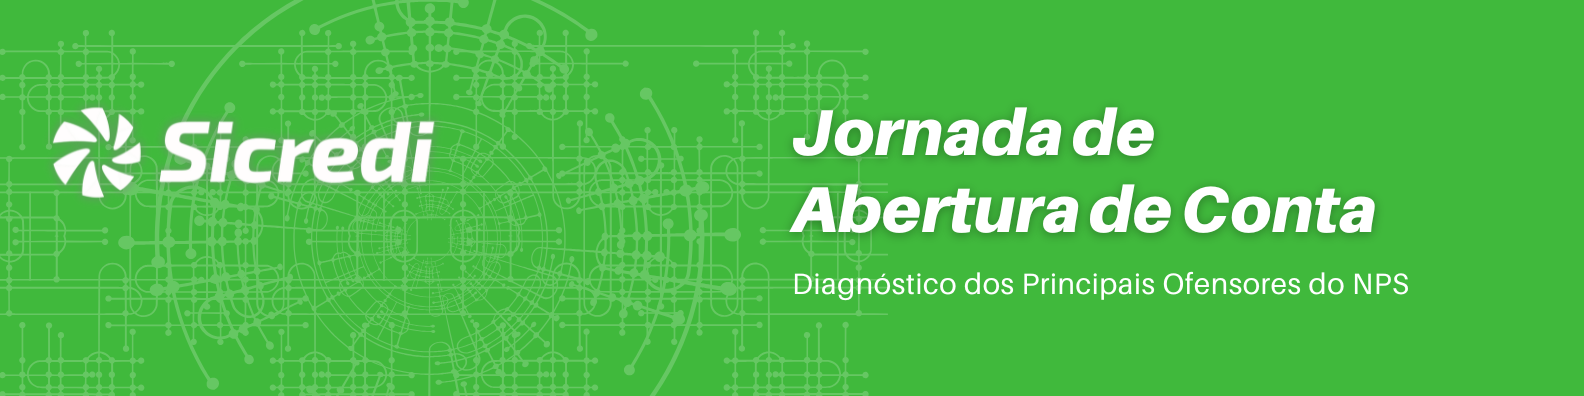

*   Autor: **Matheus Fay Soares**
*   Email: mfaysoares@gmail.com
*   Celular: +55 (51) 98275-9705


---

# **Introdução: Análise Exploratória**

Como etapa inicial do projeto, foi conduzida uma análise exploratória dos dados, com com foco na avaliação da distribuição das variáveis, detecção de possíveis outliers e identificação de inconsistências ou anomalias nos dados.

In [1]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 9999)
path = Path.cwd()

In [2]:
# Leitura da base de dados
df = pd.read_excel(str(path) + r'/base_case_analista_pesquisa_pleno_1.xlsx',
                   sheet_name = 'base completa')
print(f"Número de Respostas: {len(df)}") # Tamanho da Base
df.info()

Número de Respostas: 10000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   num_idade             10000 non-null  int64 
 1   des_sexo              10000 non-null  object
 2   des_status_associado  10000 non-null  object
 3   des_segmento          10000 non-null  object
 4   des_subsegmento       10000 non-null  object
 5   des_nivel_risco       9914 non-null   object
 6   des_assoc_desde       10000 non-null  object
 7   n_de_produtos         10000 non-null  int64 
 8   resposta_nps          10000 non-null  object
 9   des_assunto_1         7241 non-null   object
 10  des_assunto_2         2995 non-null   object
 11  des_assunto_3         1405 non-null   object
 12  des_sentimento_1      7241 non-null   object
 13  des_sentimento_2      2974 non-null   object
 14  des_sentimento_3      1405 non-null   object
dtypes: int64(2

In [3]:
# Analise inicial do dataframe
df.head(5)

,num_idade,des_sexo,des_status_associado,des_segmento,des_subsegmento,des_nivel_risco,des_assoc_desde,n_de_produtos,resposta_nps,des_assunto_1,des_assunto_2,des_assunto_3,des_sentimento_1,des_sentimento_2,des_sentimento_3
0,41,M,ATIVO,PF,PF II,ALTO 2,ATÉ 12 MESES,2,10,Atendimento em geral,NaN,NaN,negativo,NaN,NaN
1,41,F,ATIVO,PF,PF II,BAIXO 1,DE 11 A 15 ANOS,8,9,NaN,NaN,NaN,NaN,NaN,NaN
2,44,F,ATIVO,PF,PF II,ALTO 2,ATÉ 12 MESES,7,10,Outros,NaN,NaN,positivo,NaN,NaN
3,54,F,ATIVO,PF,PF II,BAIXÍSSIMO,DE 11 A 15 ANOS,6,8,NaN,NaN,NaN,NaN,NaN,NaN
4,59,F,ATIVO,PF,PF I,BAIXO 2,ATÉ 12 MESES,1,10,Satisfação geral,NaN,NaN,positivo,NaN,NaN



---


## **1. Tratamento de Inconsistências no NPS**

Durante a análise inicial, foi identificado que alguns registros apresentavam o valor **"sair"** na variável correspondente ao NPS. Por se tratar de um valor não numérico e incompatível com a medida, tais observações foram excluídas da base para garantir a integridade e consistência da análise.

In [4]:
df_corrigido = df[pd.to_numeric(df['resposta_nps'], errors='coerce').notna()].reset_index(drop = True)
print(f"Novo Número de Respostas: {len(df_corrigido)}")
print(f"Respostas Sem Avaliação: {len(df) - len(df_corrigido)}")

Novo Número de Respostas: 9882
Respostas Sem Avaliação: 118


### **1.1. Distribuição Amostral**

Antes do início das análises, foi realizada uma avaliação exploratória da composição da amostra presente na base de dados, com o objetivo de compreender o perfil dos associados, permitindo contextualizar os resultados da pesquisa e identificar possíveis vieses ou limitações de representatividade. Para isso, foram analisadas as seguintes variáveis demográficas e cadastrais:

1.   Gênero
2.   Faixa Etária
3.   Status do Associado
4.   Segmento
5.   Subsegmento
6.   Nível de Risco
7.   Tempo de Associação

#### 1.1.1. Gênero

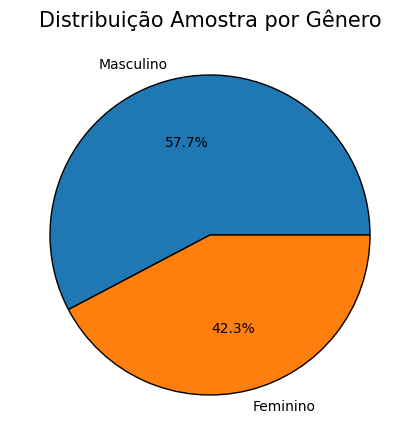

In [5]:
genero = df_corrigido['des_sexo'].value_counts()
mapa_genero = {'F': 'Feminino', 'M': 'Masculino'}
labels = [mapa_genero.get(g, g) for g in genero.index]

fig = plt.figure(figsize = (5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.pie(genero.values, labels = labels, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black', 'linewidth': 1})
eixo.set_title('Distribuição Amostra por Gênero', fontsize = 15)

plt.show()

In [6]:
idade_media_p_genero = df_corrigido.groupby(['des_sexo']).agg({'num_idade':'mean'})
idade_media_p_genero.reset_index(inplace = True)
idade_media_p_genero

,des_sexo,num_idade
0,F,39.417664
1,M,39.356241


#### 1.1.2. Faixa Etária

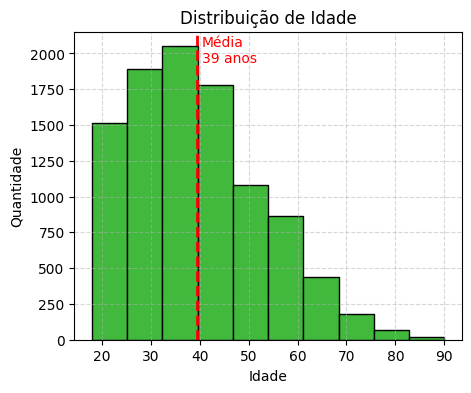

In [7]:
idades = df_corrigido['num_idade']
idade_media = idades.mean()

fig = plt.figure(figsize = (5,4))
plt.hist(idades, bins=10, edgecolor='black', color='#40b93c')

plt.axvline(idade_media, color='red', linestyle='--', linewidth=2, label=f'Média: {idade_media:.0f} anos')
plt.text(idade_media + 1, plt.ylim()[1]*0.9, f'Média\n{idade_media:.0f} anos', color='red')

plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

#### 1.1.3. Status do Associado

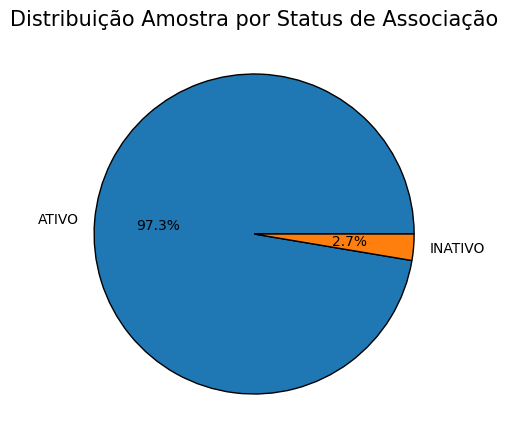

In [8]:
status = df_corrigido['des_status_associado'].value_counts()
fig = plt.figure(figsize = (5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.pie(status.values, labels = status.index, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black', 'linewidth': 1})
eixo.set_title('Distribuição Amostra por Status de Associação', fontsize = 15)

plt.show()

#### 1.1.4. Segmento e Subsegmento

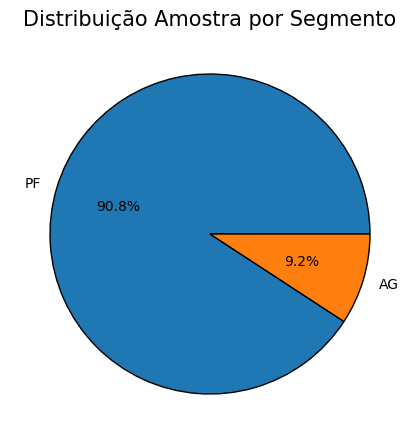

In [9]:
segmento = df_corrigido['des_segmento'].value_counts()
fig = plt.figure(figsize = (5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.pie(segmento.values, labels = segmento.index, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black', 'linewidth': 1})
eixo.set_title('Distribuição Amostra por Segmento', fontsize = 15)

plt.show()

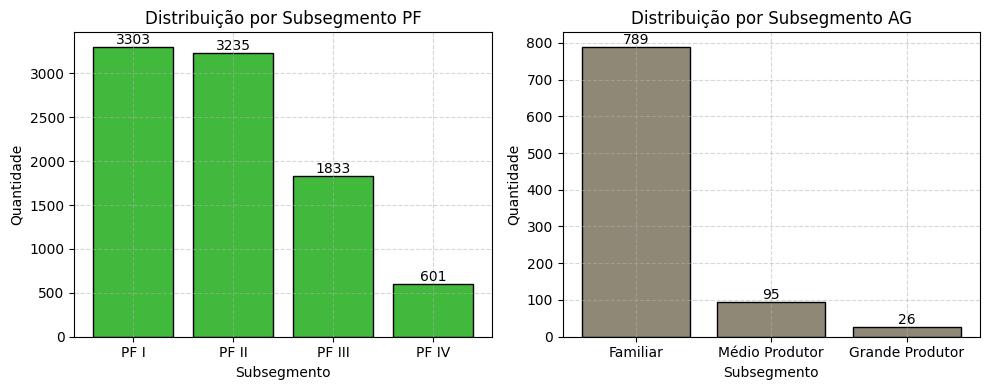

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Subsegmento PF
pf = df_corrigido[df_corrigido['des_segmento'] == 'PF'].reset_index(drop = True)
subsegmento_pf = pf['des_subsegmento'].value_counts()

# Subsegmento AG
ag = df_corrigido[df_corrigido['des_segmento'] == 'AG'].reset_index(drop = True)
subsegmento_ag = ag['des_subsegmento'].value_counts()

gf_pf = ax1.bar(subsegmento_pf.index, subsegmento_pf.values, color='#40b93c', edgecolor = 'black')
ax1.set_title('Distribuição por Subsegmento PF')
ax1.set_xlabel('Subsegmento')
ax1.set_ylabel('Quantidade')
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.bar_label(gf_pf, fmt='%d')

gf_ag = ax2.bar(subsegmento_ag.index, subsegmento_ag.values, color='#908877', edgecolor = 'black')
ax2.set_title('Distribuição por Subsegmento AG')
ax2.set_xlabel('Subsegmento')
ax2.set_ylabel('Quantidade')
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.bar_label(gf_ag, fmt='%d')

plt.tight_layout()
plt.show()

#### 1.1.5. Nível de Risco

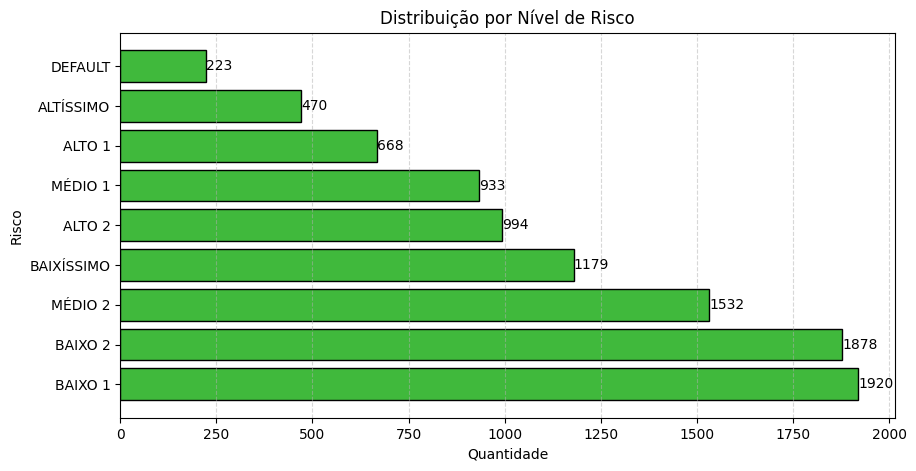

In [11]:
nv_risco = df_corrigido['des_nivel_risco'].value_counts()

plt.figure(figsize=(10, 5))
gf = plt.barh(nv_risco.index, nv_risco.values, color='#40b93c', edgecolor='black')

plt.title('Distribuição por Nível de Risco')
plt.xlabel('Quantidade')
plt.ylabel('Risco')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.bar_label(gf, fmt='%d')

plt.show()

In [12]:
df_corrigido['des_nivel_risco'].value_counts(normalize = True)

,proportion
des_nivel_risco,
BAIXO 1,0.195978
BAIXO 2,0.191691
MÉDIO 2,0.156374
BAIXÍSSIMO,0.120343
ALTO 2,0.101460
MÉDIO 1,0.095233
ALTO 1,0.068184
ALTÍSSIMO,0.047974
DEFAULT,0.022762


#### 1.1.6. Tempo de Associação

[Text(0, 0, '2870'),
 Text(0, 0, '2473'),
 Text(0, 0, '1674'),
 Text(0, 0, '1456'),
 Text(0, 0, '856'),
 Text(0, 0, '553')]

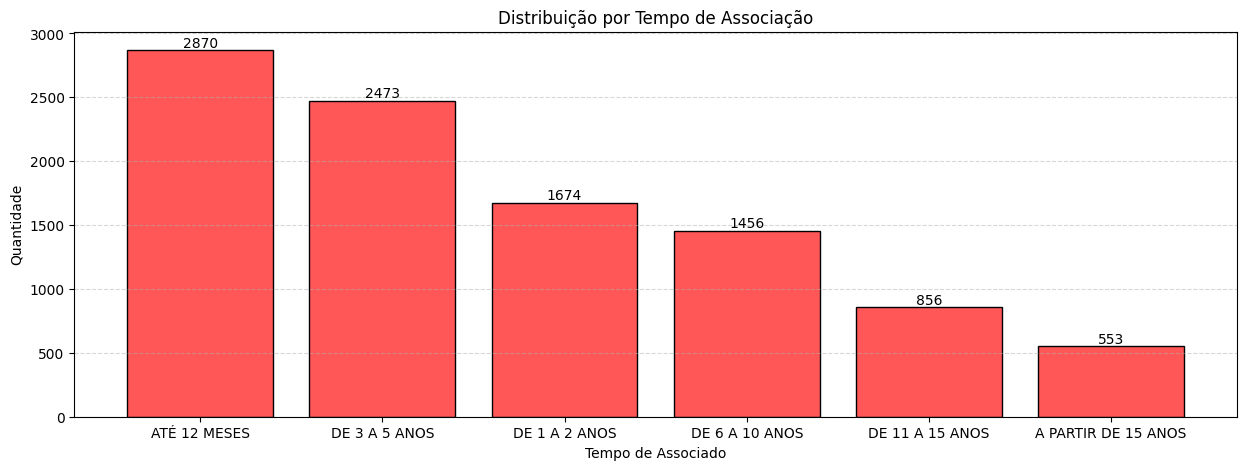

In [13]:
tempo_associado = df_corrigido['des_assoc_desde'].value_counts()

plt.figure(figsize=(15, 5))
gf = plt.bar(tempo_associado.index, tempo_associado.values, color='#FF5757', edgecolor='black')

plt.title('Distribuição por Tempo de Associação')
plt.xlabel('Tempo de Associado')
plt.ylabel('Quantidade')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.bar_label(gf, fmt='%d')

In [14]:
df_corrigido['des_assoc_desde'].value_counts(normalize = True)

,proportion
des_assoc_desde,
ATÉ 12 MESES,0.290427
DE 3 A 5 ANOS,0.250253
DE 1 A 2 ANOS,0.169399
DE 6 A 10 ANOS,0.147339
DE 11 A 15 ANOS,0.086622
A PARTIR DE 15 ANOS,0.055960



---
## **2. NPS Associados**
Na etapa seguinte, os associados foram categorizados com base em sua resposta ao NPS, conforme a metodologia tradicional da métrica:

*   **Promotores**: notas entre 9 e 10
*   **Neutros**: notas entre 7 e 8
*   **Detratores**: notas entre 0 e 6

Essa segmentação permite análises comparativas entre os grupos, possibilitando a identificação de padrões comportamentais e oportunidades de melhoria na experiência.

In [15]:
df_corrigido['resposta_nps'] = df_corrigido['resposta_nps'].astype(int)
conditions = [(df_corrigido['resposta_nps'] >= 9),
              (df_corrigido['resposta_nps'] <= 6)]
choices = ['PROMOTORES', 'DETRATORES']
df_corrigido['classificacao_nps'] = np.select(conditions, choices, default='NEUTROS')
df_corrigido.head(5)

,num_idade,des_sexo,des_status_associado,des_segmento,des_subsegmento,des_nivel_risco,des_assoc_desde,n_de_produtos,resposta_nps,des_assunto_1,des_assunto_2,des_assunto_3,des_sentimento_1,des_sentimento_2,des_sentimento_3,classificacao_nps
0,41,M,ATIVO,PF,PF II,ALTO 2,ATÉ 12 MESES,2,10,Atendimento em geral,NaN,NaN,negativo,NaN,NaN,PROMOTORES
1,41,F,ATIVO,PF,PF II,BAIXO 1,DE 11 A 15 ANOS,8,9,NaN,NaN,NaN,NaN,NaN,NaN,PROMOTORES
2,44,F,ATIVO,PF,PF II,ALTO 2,ATÉ 12 MESES,7,10,Outros,NaN,NaN,positivo,NaN,NaN,PROMOTORES
3,54,F,ATIVO,PF,PF II,BAIXÍSSIMO,DE 11 A 15 ANOS,6,8,NaN,NaN,NaN,NaN,NaN,NaN,NEUTROS
4,59,F,ATIVO,PF,PF I,BAIXO 2,ATÉ 12 MESES,1,10,Satisfação geral,NaN,NaN,positivo,NaN,NaN,PROMOTORES


### **2.1. Cálculo do NPS a partir da Distribuição**

A partir da distribuição dos respondentes entre as categorias Promotores, Neutros e Detratores, foi possível calcular o valor do NPS utilizando a fórmula padrão:

**NPS = %Promotores − %Detratores**




In [16]:
df_corrigido['classificacao_nps'].value_counts()

,count
classificacao_nps,
PROMOTORES,7558
NEUTROS,1262
DETRATORES,1062


[Text(0, 0, '7558'), Text(0, 0, '1262'), Text(0, 0, '1062')]

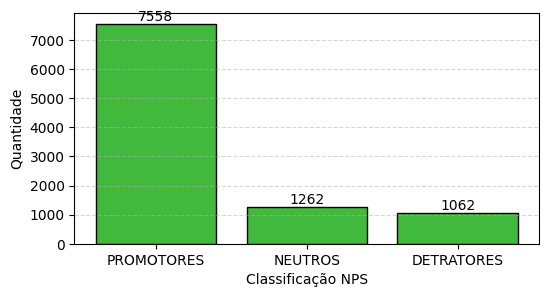

In [17]:
classificacao_nps = df_corrigido['classificacao_nps'].value_counts()

plt.figure(figsize=(6, 3))
gf = plt.bar(classificacao_nps.index, classificacao_nps.values, color='#40b93c', edgecolor='black')

plt.xlabel('Classificação NPS')
plt.ylabel('Quantidade')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.bar_label(gf, fmt='%d')

In [18]:
NPS = ((df_corrigido['classificacao_nps'] == 'PROMOTORES').sum() - (df_corrigido['classificacao_nps'] == 'DETRATORES').sum()) / len(df_corrigido) * 100
print(f"NPS: {round(NPS, 1)}")

NPS: 65.7


Conforme validado na etapa anterior, o NPS calculado com base nas respostas dos associados foi de aproximadamente **66**, valor significativamente superior ao **40** mencionado no descritivo inicial da pesquisa.



---
## **3. Classificação dos Associados**
Com base nas demais variáveis disponíveis no conjunto de dados, foi realizada uma análise segmentada da classificação dos associados (Promotores, Neutros e Detratores), conforme os critérios do NPS. O objetivo foi identificar padrões, correlações ou variações relevantes no comportamento dos respondentes sob diferentes dimensões, como unidade de atendimento, faixa etária, tempo de associação, entre outros.

### **3.1. Idade**


In [19]:
# Transformando a variável de idade em categórica, para plotar o gráfico
df_corrigido['faixa_idade'] = pd.cut(df_corrigido['num_idade'],
                                  bins=[0, 25, 35, 45, 55, 70,
                                        df_corrigido['num_idade'].max()],
                                  labels=['<25', '25-35', '36-45', '46-55', '56-70', '70+'],
                                  right=False)
df_corrigido.head(3)

,num_idade,des_sexo,des_status_associado,des_segmento,des_subsegmento,des_nivel_risco,des_assoc_desde,n_de_produtos,resposta_nps,des_assunto_1,des_assunto_2,des_assunto_3,des_sentimento_1,des_sentimento_2,des_sentimento_3,classificacao_nps,faixa_idade
0,41,M,ATIVO,PF,PF II,ALTO 2,ATÉ 12 MESES,2,10,Atendimento em geral,NaN,NaN,negativo,NaN,NaN,PROMOTORES,36-45
1,41,F,ATIVO,PF,PF II,BAIXO 1,DE 11 A 15 ANOS,8,9,NaN,NaN,NaN,NaN,NaN,NaN,PROMOTORES,36-45
2,44,F,ATIVO,PF,PF II,ALTO 2,ATÉ 12 MESES,7,10,Outros,NaN,NaN,positivo,NaN,NaN,PROMOTORES,36-45


In [20]:
df_corrigido['faixa_idade'].value_counts(normalize = True)

,proportion
faixa_idade,
36-45,0.286640
25-35,0.267105
46-55,0.170648
<25,0.131984
56-70,0.119433
70+,0.024190


/tmp/ipython-input-21-2820256682.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nps_por_idade = df_corrigido.groupby(['faixa_idade', 'classificacao_nps']).size().unstack(fill_value=0)


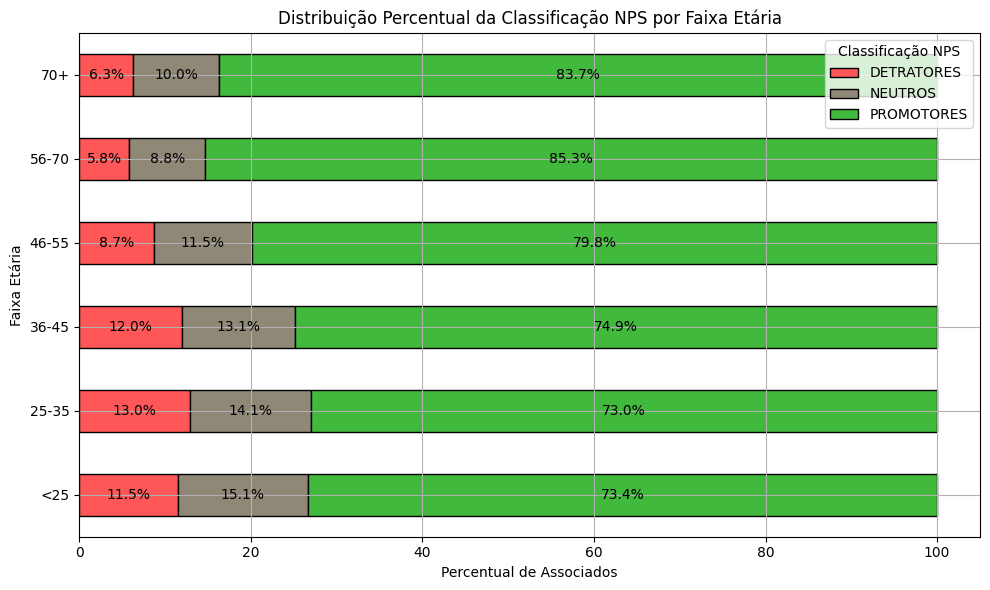

In [21]:
nps_por_idade = df_corrigido.groupby(['faixa_idade', 'classificacao_nps']).size().unstack(fill_value=0)
nps_por_idade_pct = nps_por_idade.divide(nps_por_idade.sum(axis=1), axis=0) * 100

colors = ['#FF5757', '#908877', '#40b93c']
ax = nps_por_idade_pct.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors, edgecolor = 'black')

for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%')

plt.ylabel('Faixa Etária')
plt.xlabel('Percentual de Associados')
plt.title('Distribuição Percentual da Classificação NPS por Faixa Etária')
plt.tight_layout()
plt.legend(title = 'Classificação NPS')
plt.grid()
plt.show()

### **3.2. Gênero**

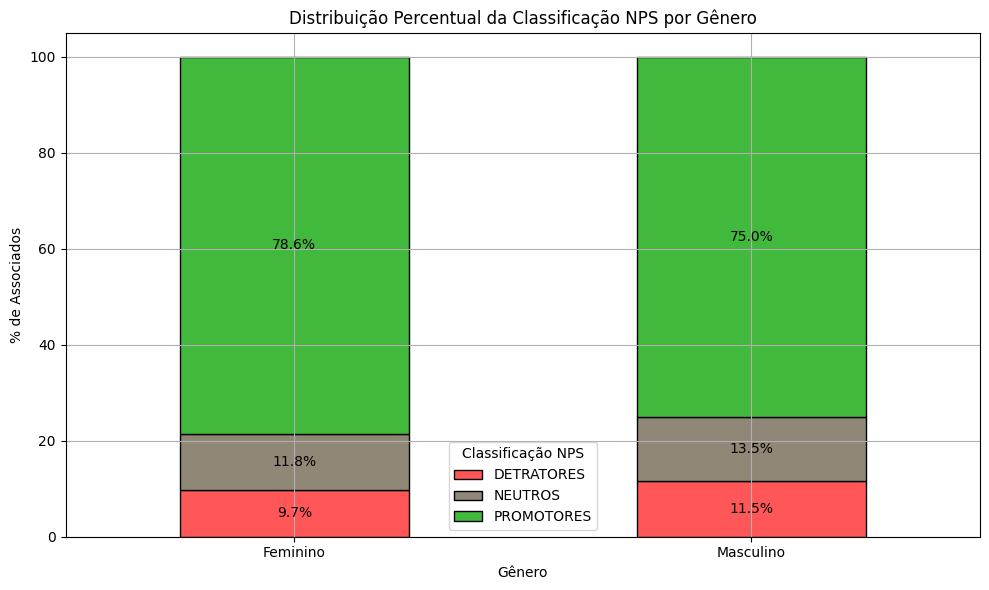

In [22]:
nps_por_genero = df_corrigido.groupby(['des_sexo', 'classificacao_nps']).size().unstack(fill_value=0)
nps_por_genero_pct = nps_por_genero.divide(nps_por_genero.sum(axis=1), axis=0) * 100

colors = ['#FF5757', '#908877', '#40b93c']
ax = nps_por_genero_pct.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors, edgecolor = 'black')
ax.set_xticklabels(['Feminino', 'Masculino'], rotation=0)

for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%')

plt.ylabel('% de Associados')
plt.xlabel('Gênero')
plt.title('Distribuição Percentual da Classificação NPS por Gênero')
plt.tight_layout()
plt.legend(title = 'Classificação NPS', loc = 'lower center')
plt.grid()
plt.show()

### **3.3. Número de produtos**


In [23]:
conditions = [
    df_corrigido['n_de_produtos'] == 0,
    df_corrigido['n_de_produtos'].between(1, 4),
    df_corrigido['n_de_produtos'].between(5, 9),
    df_corrigido['n_de_produtos'].between(10, 14),
    df_corrigido['n_de_produtos'] >= 15
]
choices = ['0', '1-4', '5-9', '10-14', '15+']

df_corrigido['faixa_produtos'] = np.select(conditions, choices, default='outro')
df_corrigido.head(3)

,num_idade,des_sexo,des_status_associado,des_segmento,des_subsegmento,des_nivel_risco,des_assoc_desde,n_de_produtos,resposta_nps,des_assunto_1,des_assunto_2,des_assunto_3,des_sentimento_1,des_sentimento_2,des_sentimento_3,classificacao_nps,faixa_idade,faixa_produtos
0,41,M,ATIVO,PF,PF II,ALTO 2,ATÉ 12 MESES,2,10,Atendimento em geral,NaN,NaN,negativo,NaN,NaN,PROMOTORES,36-45,1-4
1,41,F,ATIVO,PF,PF II,BAIXO 1,DE 11 A 15 ANOS,8,9,NaN,NaN,NaN,NaN,NaN,NaN,PROMOTORES,36-45,5-9
2,44,F,ATIVO,PF,PF II,ALTO 2,ATÉ 12 MESES,7,10,Outros,NaN,NaN,positivo,NaN,NaN,PROMOTORES,36-45,5-9


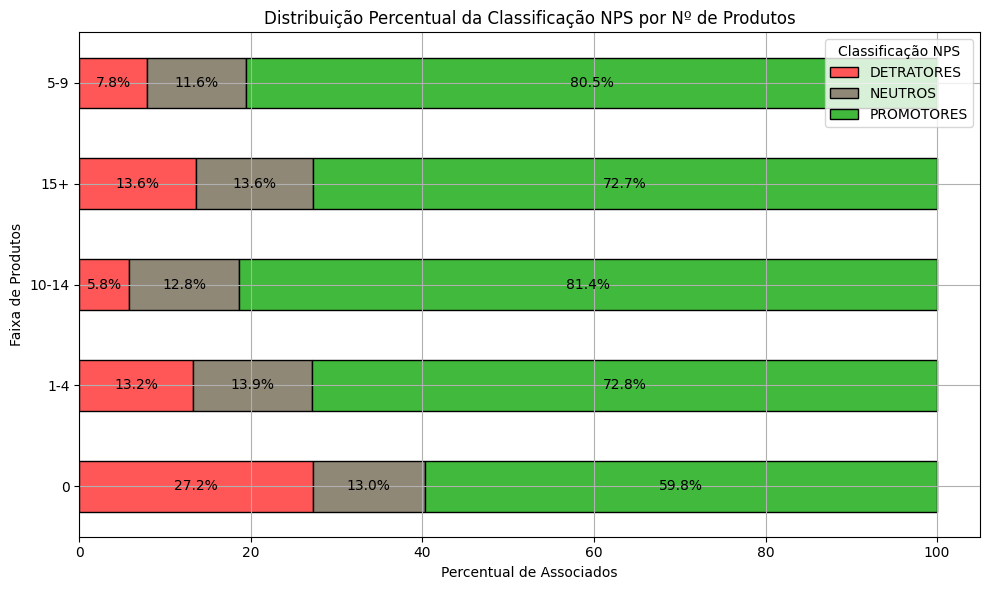

In [24]:
nps_por_prod = df_corrigido.groupby(['faixa_produtos', 'classificacao_nps']).size().unstack(fill_value=0)
nps_por_prod_pct = nps_por_prod.divide(nps_por_prod.sum(axis=1), axis=0) * 100

colors = ['#FF5757', '#908877', '#40b93c']
ax = nps_por_prod_pct.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors, edgecolor = 'black')

for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%')

plt.ylabel('Faixa de Produtos')
plt.xlabel('Percentual de Associados')
plt.title('Distribuição Percentual da Classificação NPS por Nº de Produtos')
plt.tight_layout()
plt.legend(title = 'Classificação NPS')
plt.grid()
plt.show()

### **3.4. Segmentos e Subsegmentos**

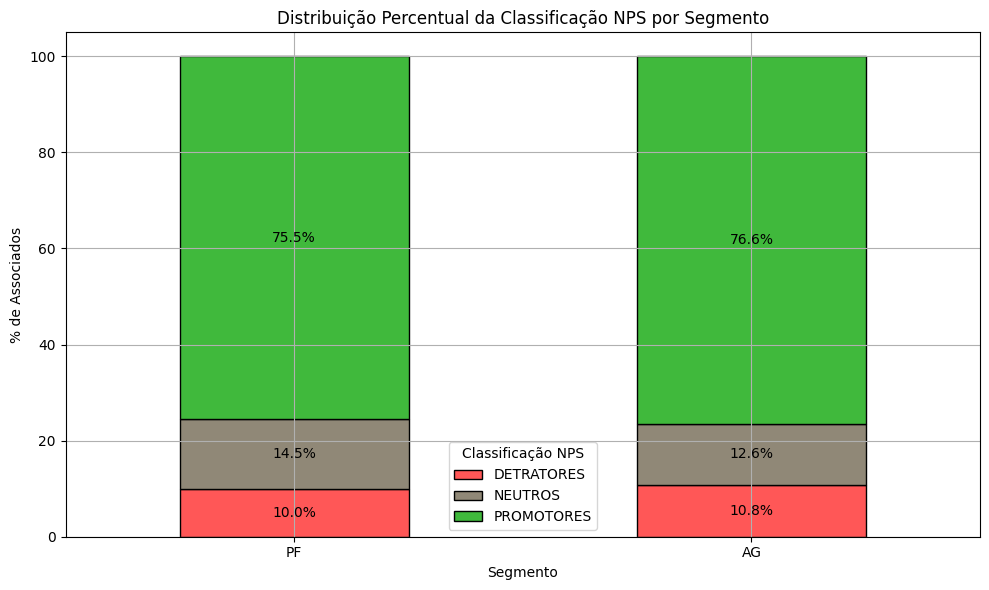

In [25]:
nps_por_segmento = df_corrigido.groupby(['des_segmento', 'classificacao_nps']).size().unstack(fill_value=0)
nps_por_segmento_pct = nps_por_segmento.divide(nps_por_segmento.sum(axis=1), axis=0) * 100

colors = ['#FF5757', '#908877', '#40b93c']
ax = nps_por_segmento_pct.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors, edgecolor = 'black')
ax.set_xticklabels(['PF', 'AG'], rotation=0)

for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%')

plt.ylabel('% de Associados')
plt.xlabel('Segmento')
plt.title('Distribuição Percentual da Classificação NPS por Segmento')
plt.tight_layout()
plt.legend(title = 'Classificação NPS', loc = 'lower center')
plt.grid()
plt.show()

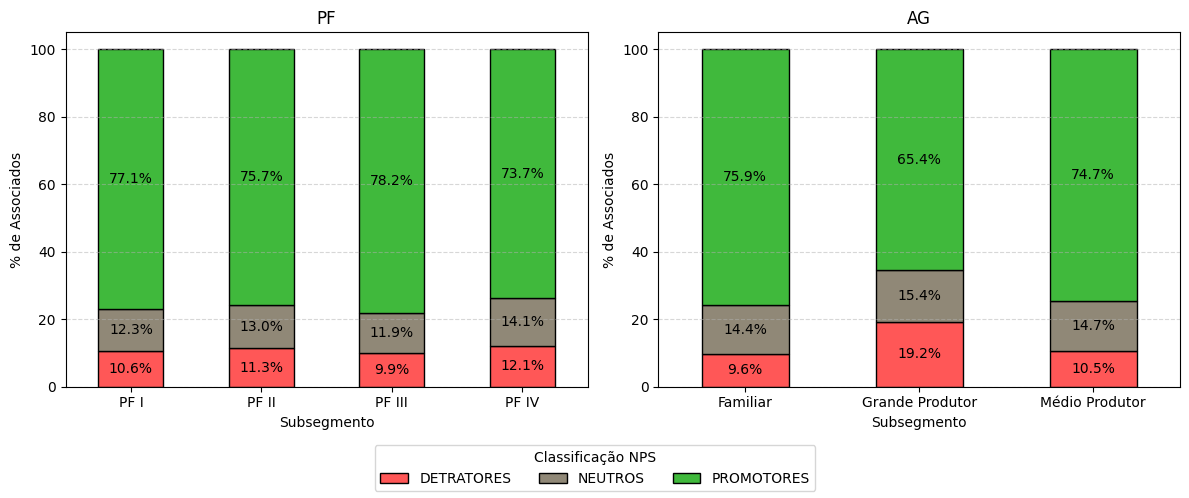

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Subsegmentos
pf = df_corrigido[df_corrigido['des_segmento'] == 'PF'].reset_index(drop=True)
ag = df_corrigido[df_corrigido['des_segmento'] == 'AG'].reset_index(drop=True)

nps_por_segmento_pf = pf.groupby(['des_subsegmento', 'classificacao_nps']).size().unstack(fill_value=0)
nps_por_segmento_pf_pct = nps_por_segmento_pf.divide(nps_por_segmento_pf.sum(axis=1), axis=0) * 100

nps_por_segmento_ag = ag.groupby(['des_subsegmento', 'classificacao_nps']).size().unstack(fill_value=0)
nps_por_segmento_ag_pct = nps_por_segmento_ag.divide(nps_por_segmento_ag.sum(axis=1), axis=0) * 100

colors = ['#FF5757', '#908877', '#40b93c']

# PF
nps_por_segmento_pf_pct.plot(kind='bar', stacked=True, color=colors, edgecolor='black', ax=ax1)
ax1.set_xticklabels(nps_por_segmento_pf_pct.index, rotation=0)
ax1.set_title('PF')
ax1.set_ylabel('% de Associados')
ax1.set_xlabel('Subsegmento')
ax1.grid(True, axis='y', linestyle='--', alpha=0.5)
for container in ax1.containers:
    ax1.bar_label(container, label_type='center', fmt='%.1f%%')
ax1.legend().remove()

# AG
nps_por_segmento_ag_pct.plot(kind='bar', stacked=True, color=colors, edgecolor='black', ax=ax2)
ax2.set_xticklabels(nps_por_segmento_ag_pct.index, rotation=0)
ax2.set_title('AG')
ax2.set_ylabel('% de Associados')
ax2.set_xlabel('Subsegmento')
ax2.grid(True, axis='y', linestyle='--', alpha=0.5)
for container in ax2.containers:
    ax2.bar_label(container, label_type='center', fmt='%.1f%%')
ax2.legend().remove()

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, title='Classificação NPS', loc='lower center', ncol=3)
plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()


### **3.5. Nível de Risco**

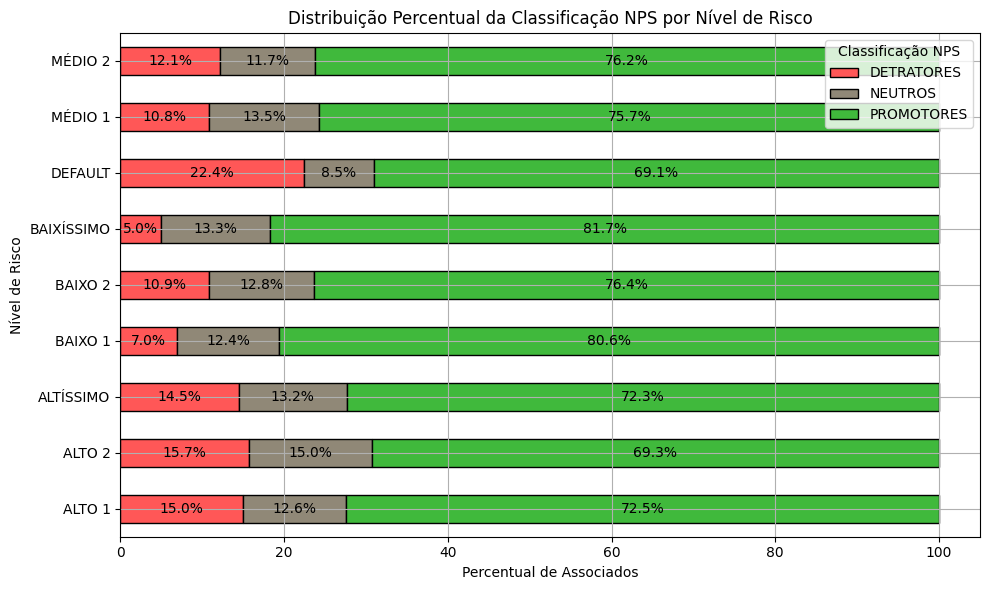

In [27]:
nps_por_risco = df_corrigido.groupby(['des_nivel_risco', 'classificacao_nps']).size().unstack(fill_value=0)
nps_por_risco_pct = nps_por_risco.divide(nps_por_risco.sum(axis=1), axis=0) * 100

colors = ['#FF5757', '#908877', '#40b93c']
ax = nps_por_risco_pct.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors, edgecolor = 'black')

for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%')

plt.ylabel('Nível de Risco')
plt.xlabel('Percentual de Associados')
plt.title('Distribuição Percentual da Classificação NPS por Nível de Risco')
plt.tight_layout()
plt.legend(title = 'Classificação NPS')
plt.grid()
plt.show()

### **3.6. Status de Associação**

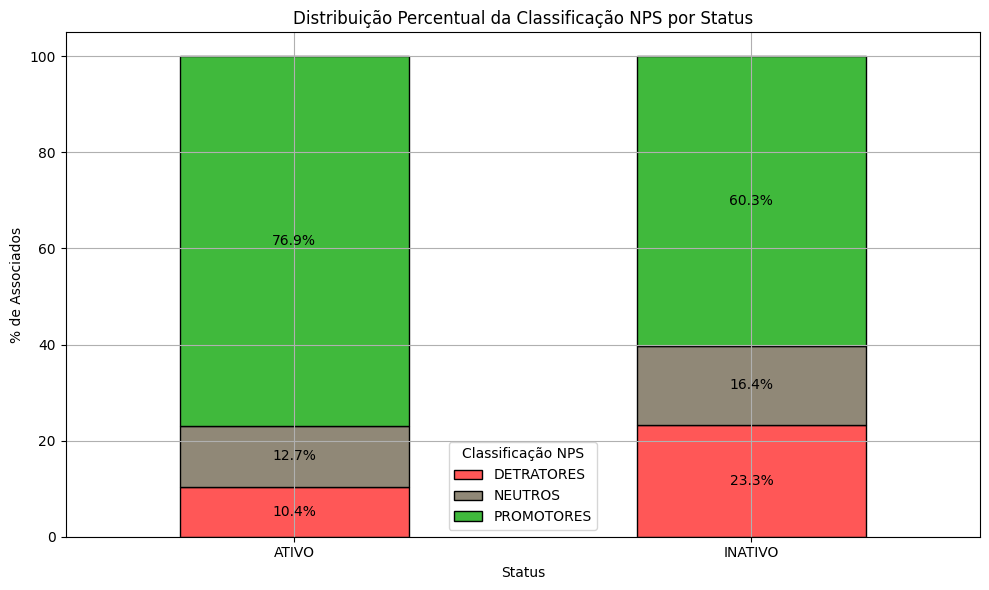

In [28]:
nps_por_status = df_corrigido.groupby(['des_status_associado', 'classificacao_nps']).size().unstack(fill_value=0)
nps_por_status_pct = nps_por_status.divide(nps_por_status.sum(axis=1), axis=0) * 100

colors = ['#FF5757', '#908877', '#40b93c']
ax = nps_por_status_pct.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors, edgecolor = 'black')
ax.set_xticklabels(nps_por_status_pct.index, rotation=0)

for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%')

plt.ylabel('% de Associados')
plt.xlabel('Status')
plt.title('Distribuição Percentual da Classificação NPS por Status')
plt.tight_layout()
plt.legend(title = 'Classificação NPS', loc = 'lower center')
plt.grid()
plt.show()

### **3.7. Tempo de Associação**

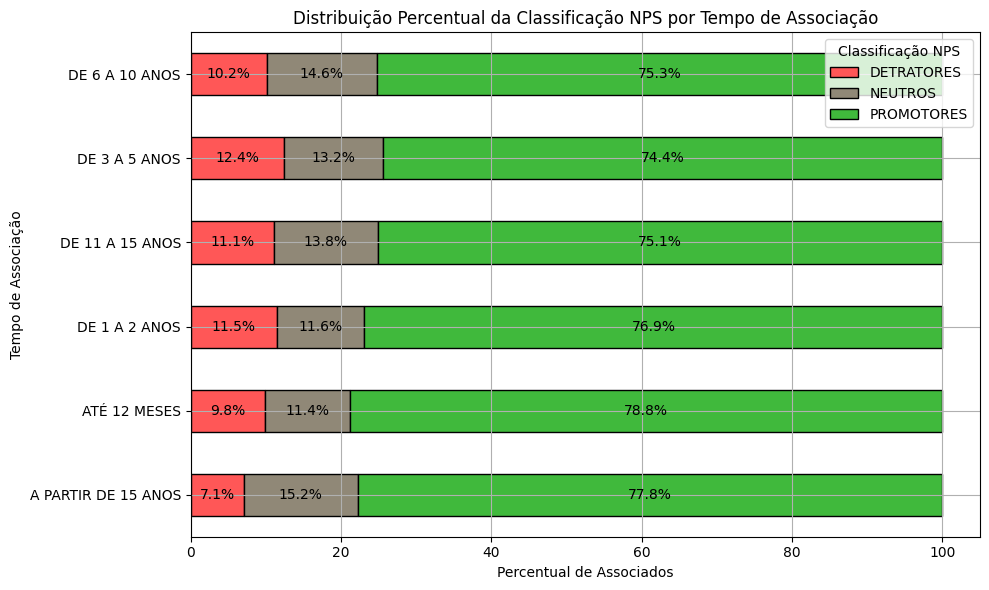

In [29]:
nps_por_tempo = df_corrigido.groupby(['des_assoc_desde', 'classificacao_nps']).size().unstack(fill_value=0)
nps_por_tempo_pct = nps_por_tempo.divide(nps_por_tempo.sum(axis=1), axis=0) * 100

colors = ['#FF5757', '#908877', '#40b93c']
ax = nps_por_tempo_pct.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors, edgecolor = 'black')

for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%')

plt.ylabel('Tempo de Associação')
plt.xlabel('Percentual de Associados')
plt.title('Distribuição Percentual da Classificação NPS por Tempo de Associação')
plt.tight_layout()
plt.legend(title = 'Classificação NPS')
plt.grid()
plt.show()

---
## **4. Análise de Sentimentos**
A base de dados disponibiliza colunas que categorizam as respostas abertas dos clientes, assim como a análise do sentimento associado a cada resposta. A partir dessas informações, foi conduzida uma análise com o objetivo de identificar os principais ofensores do NPS, por meio da distribuição dos sentimentos em relação aos temas abordados.

In [30]:
df_detratores = df_corrigido[df_corrigido['classificacao_nps'] == 'DETRATORES'].reset_index(drop = True)
print(f'Número de Detratores: {len(df_detratores)}')
df_detratores.head(3)

Número de Detratores: 1062


,num_idade,des_sexo,des_status_associado,des_segmento,des_subsegmento,des_nivel_risco,des_assoc_desde,n_de_produtos,resposta_nps,des_assunto_1,des_assunto_2,des_assunto_3,des_sentimento_1,des_sentimento_2,des_sentimento_3,classificacao_nps,faixa_idade,faixa_produtos
0,43,M,ATIVO,AG,Familiar,MÉDIO 1,DE 3 A 5 ANOS,7,6,NaN,NaN,NaN,NaN,NaN,NaN,DETRATORES,36-45,5-9
1,42,M,ATIVO,PF,PF III,BAIXO 1,DE 6 A 10 ANOS,2,5,Atendimento em geral,NaN,NaN,neutro,NaN,NaN,DETRATORES,36-45,1-4
2,38,F,INATIVO,PF,PF I,ALTÍSSIMO,DE 1 A 2 ANOS,0,5,Cartão de Crédito,NaN,NaN,neutro,NaN,NaN,DETRATORES,36-45,0


In [31]:
assuntos_detratores = []
for i in range(1, 4):
    aux = df_detratores[[f'des_assunto_{i}', f'des_sentimento_{i}']].copy()
    aux.columns = ['Assunto', 'Sentimento']
    assuntos_detratores.append(aux)

assuntos_detratores = pd.concat(assuntos_detratores, ignore_index=True)
assuntos_detratores.head(3)

,Assunto,Sentimento
0,NaN,NaN
1,Atendimento em geral,neutro
2,Cartão de Crédito,neutro


Para garantir a consistência da análise, foram desconsiderados os registros cujos respondentes não indicaram um assunto correspondente em suas respostas abertas.

In [32]:
assuntos_detratores.dropna(subset = ['Assunto', 'Sentimento'], inplace = True)
assuntos_detratores.head(3)

,Assunto,Sentimento
1,Atendimento em geral,neutro
2,Cartão de Crédito,neutro
3,"Crédito, Empréstimo ou Financiamento",neutro


In [33]:
assuntos = assuntos_detratores.groupby(['Assunto', 'Sentimento']).size().unstack(fill_value=0)
assuntos.reset_index(inplace = True)
assuntos.head(3)

Sentimento,Assunto,negativo,neutro,positivo
0,Assertividade ou Orientação,14,5,2
1,Atendimento em geral,38,51,10
2,Benefícios,22,3,10


In [34]:
assuntos['total'] = assuntos['negativo'] + assuntos['neutro'] + assuntos['positivo']
assuntos.head(3)

Sentimento,Assunto,negativo,neutro,positivo,total
0,Assertividade ou Orientação,14,5,2,21
1,Atendimento em geral,38,51,10,99
2,Benefícios,22,3,10,35


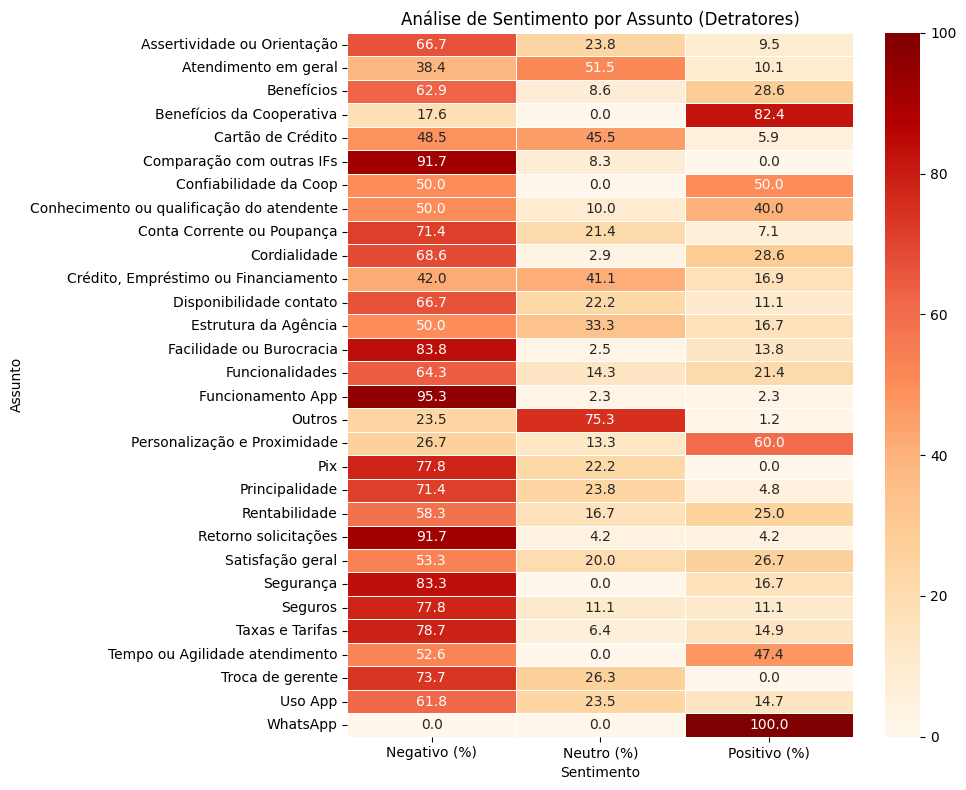

In [35]:
assuntos['negativo_pct'] = (assuntos['negativo'] / assuntos['total']) * 100
assuntos['neutro_pct'] = (assuntos['neutro'] / assuntos['total']) * 100
assuntos['positivo_pct'] = (assuntos['positivo'] / assuntos['total']) * 100

heatmap_data = assuntos.set_index('Assunto')[['negativo_pct', 'neutro_pct', 'positivo_pct']]
heatmap_data.columns = ['Negativo (%)', 'Neutro (%)', 'Positivo (%)']

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='OrRd', linewidths=.5)

plt.title('Análise de Sentimento por Assunto (Detratores)')
plt.xlabel('Sentimento')
plt.ylabel('Assunto')
plt.tight_layout()
plt.show()

Analisando os 10 principais tópicos mencionados:

In [36]:
assuntos_top10 = assuntos.sort_values(by = 'total', ascending = False).reset_index(drop = True).head(10)
assuntos_top10.head(10)

Sentimento,Assunto,negativo,neutro,positivo,total,negativo_pct,neutro_pct,positivo_pct
0,"Crédito, Empréstimo ou Financiamento",92,90,37,219,42.009132,41.095890,16.894977
1,Cartão de Crédito,49,46,6,101,48.514851,45.544554,5.940594
2,Atendimento em geral,38,51,10,99,38.383838,51.515152,10.101010
3,Outros,19,61,1,81,23.456790,75.308642,1.234568
4,Facilidade ou Burocracia,67,2,11,80,83.750000,2.500000,13.750000
5,Taxas e Tarifas,37,3,7,47,78.723404,6.382979,14.893617
6,Funcionamento App,41,1,1,43,95.348837,2.325581,2.325581
7,Tempo ou Agilidade atendimento,20,0,18,38,52.631579,0.000000,47.368421
8,Disponibilidade contato,24,8,4,36,66.666667,22.222222,11.111111
9,Benefícios,22,3,10,35,62.857143,8.571429,28.571429


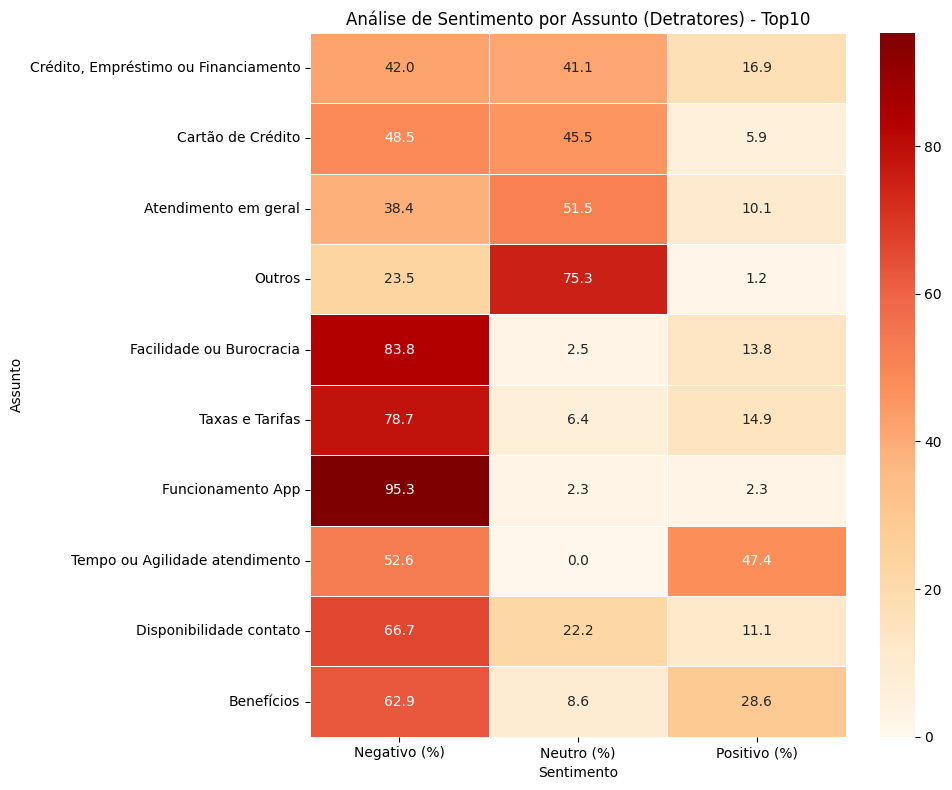

In [37]:
heatmap_data = assuntos_top10.set_index('Assunto')[['negativo_pct', 'neutro_pct', 'positivo_pct']]
heatmap_data.columns = ['Negativo (%)', 'Neutro (%)', 'Positivo (%)']

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='OrRd', linewidths=.5)

plt.title('Análise de Sentimento por Assunto (Detratores) - Top10')
plt.xlabel('Sentimento')
#plt.ylabel('Assunto')
plt.tight_layout()
plt.show()

---
## **5. Foco no Sentimento dos Ofensores**
Como aprofundamento da análise, será avaliado o sentimento das respostas abertas segmentado por assunto, com foco exclusivo nos clientes classificados como Detratores e vinculados aos índices com as piores taxas de NPS, conforme identificado nas análises anteriores.

A intenção é compreender com maior profundidade os principais fatores de insatisfação nesses contextos específicos, destacando os assuntos mais recorrentes e os sentimentos predominantes associados a eles.

Os índices com as menores taxas de NPS e o foco desta análise são:


1.   Associados com nenhum produto contratado;
2.   Risco alto e default;
3.   Segmento agricultor (AG) da classe grande produtor;
4.   Associados com idade até 45 anos.




In [38]:
df_sentimento = []
for i in range(1,4):
  colunas = [col for col in df_detratores.columns if col not in [f'des_assunto_{j}' for j in range(1, 4)] and col not in [f'des_sentimento_{j}' for j in range(1, 4)]]
  colunas.extend([f'des_assunto_{i}', f'des_sentimento_{i}'])

  aux_sentimento = df_detratores[colunas].copy()
  aux_sentimento.rename(columns = {f'des_assunto_{i}': 'Assunto', f'des_sentimento_{i}': 'Sentimento'}, inplace=True)
  df_sentimento.append(aux_sentimento)

df_sentimento = pd.concat(df_sentimento, ignore_index=True)
df_sentimento.head(3)


,num_idade,des_sexo,des_status_associado,des_segmento,des_subsegmento,des_nivel_risco,des_assoc_desde,n_de_produtos,resposta_nps,classificacao_nps,faixa_idade,faixa_produtos,Assunto,Sentimento
0,43,M,ATIVO,AG,Familiar,MÉDIO 1,DE 3 A 5 ANOS,7,6,DETRATORES,36-45,5-9,NaN,NaN
1,42,M,ATIVO,PF,PF III,BAIXO 1,DE 6 A 10 ANOS,2,5,DETRATORES,36-45,1-4,Atendimento em geral,neutro
2,38,F,INATIVO,PF,PF I,ALTÍSSIMO,DE 1 A 2 ANOS,0,5,DETRATORES,36-45,0,Cartão de Crédito,neutro


In [39]:
df_sentimento.dropna(subset = ['Assunto', 'Sentimento'], inplace = True)
df_sentimento.head(3)

,num_idade,des_sexo,des_status_associado,des_segmento,des_subsegmento,des_nivel_risco,des_assoc_desde,n_de_produtos,resposta_nps,classificacao_nps,faixa_idade,faixa_produtos,Assunto,Sentimento
1,42,M,ATIVO,PF,PF III,BAIXO 1,DE 6 A 10 ANOS,2,5,DETRATORES,36-45,1-4,Atendimento em geral,neutro
2,38,F,INATIVO,PF,PF I,ALTÍSSIMO,DE 1 A 2 ANOS,0,5,DETRATORES,36-45,0,Cartão de Crédito,neutro
3,47,F,ATIVO,PF,PF I,MÉDIO 2,DE 3 A 5 ANOS,4,6,DETRATORES,46-55,1-4,"Crédito, Empréstimo ou Financiamento",neutro


### **5.1. Associados sem Nenhum Produto**


In [40]:
df_sentimento_0_prod = df_sentimento[df_sentimento['n_de_produtos'] == 0].reset_index(drop = True)
df_sentimento_0_prod.head(3)

,num_idade,des_sexo,des_status_associado,des_segmento,des_subsegmento,des_nivel_risco,des_assoc_desde,n_de_produtos,resposta_nps,classificacao_nps,faixa_idade,faixa_produtos,Assunto,Sentimento
0,38,F,INATIVO,PF,PF I,ALTÍSSIMO,DE 1 A 2 ANOS,0,5,DETRATORES,36-45,0,Cartão de Crédito,neutro
1,38,M,ATIVO,PF,PF II,MÉDIO 2,DE 3 A 5 ANOS,0,5,DETRATORES,36-45,0,Disponibilidade contato,negativo
2,46,M,ATIVO,AG,Familiar,BAIXO 2,DE 6 A 10 ANOS,0,2,DETRATORES,46-55,0,Atendimento em geral,negativo


In [41]:
asst_0_prod = df_sentimento_0_prod.groupby(['Assunto', 'Sentimento']).size().unstack(fill_value=0)
asst_0_prod.reset_index(inplace = True)
asst_0_prod['total'] = asst_0_prod['negativo'] + asst_0_prod['neutro'] + asst_0_prod['positivo']
asst_0_prod.head(3)

Sentimento,Assunto,negativo,neutro,positivo,total
0,Assertividade ou Orientação,2,0,0,2
1,Atendimento em geral,5,1,2,8
2,Benefícios,1,0,1,2


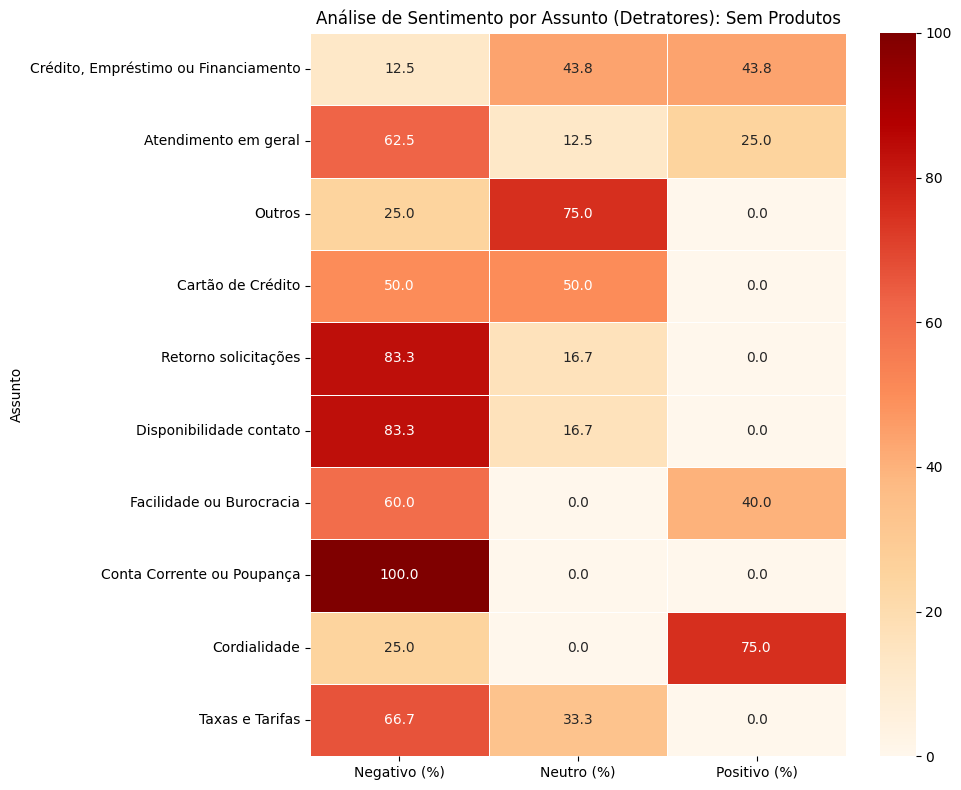

In [42]:
asst_0_prod['negativo_pct'] = (asst_0_prod['negativo'] / asst_0_prod['total']) * 100
asst_0_prod['neutro_pct'] = (asst_0_prod['neutro'] / asst_0_prod['total']) * 100
asst_0_prod['positivo_pct'] = (asst_0_prod['positivo'] / asst_0_prod['total']) * 100

asst_0_prod = asst_0_prod.sort_values(by = 'total', ascending = False).reset_index(drop = True).head(10)
heatmap_data = asst_0_prod.set_index('Assunto')[['negativo_pct', 'neutro_pct', 'positivo_pct']]
heatmap_data.columns = ['Negativo (%)', 'Neutro (%)', 'Positivo (%)']

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='OrRd', linewidths=.5)

plt.title('Análise de Sentimento por Assunto (Detratores): Sem Produtos')
#plt.xlabel('Sentimento')
plt.ylabel('Assunto')
plt.tight_layout()
plt.show()

### **5.2. Associados de Risco Elevado**

In [43]:
df_sentimento_risco = df_sentimento[df_sentimento['des_nivel_risco'].isin(['DEFAULT','ALTO 1','ALTO 2','ALTÍSSIMO'])].reset_index(drop = True)
df_sentimento_risco.head(3)

,num_idade,des_sexo,des_status_associado,des_segmento,des_subsegmento,des_nivel_risco,des_assoc_desde,n_de_produtos,resposta_nps,classificacao_nps,faixa_idade,faixa_produtos,Assunto,Sentimento
0,38,F,INATIVO,PF,PF I,ALTÍSSIMO,DE 1 A 2 ANOS,0,5,DETRATORES,36-45,0,Cartão de Crédito,neutro
1,45,M,ATIVO,PF,PF I,ALTO 2,DE 1 A 2 ANOS,1,5,DETRATORES,46-55,1-4,Cartão de Crédito,negativo
2,38,M,ATIVO,PF,PF IV,ALTO 2,DE 1 A 2 ANOS,3,5,DETRATORES,36-45,1-4,Cartão de Crédito,neutro


In [44]:
asst_risco = df_sentimento_risco.groupby(['Assunto', 'Sentimento']).size().unstack(fill_value=0)
asst_risco.reset_index(inplace = True)
asst_risco['total'] = asst_risco['negativo'] + asst_risco['neutro'] + asst_risco['positivo']
asst_risco.head(3)

Sentimento,Assunto,negativo,neutro,positivo,total
0,Assertividade ou Orientação,2,2,1,5
1,Atendimento em geral,10,14,1,25
2,Benefícios,4,1,4,9


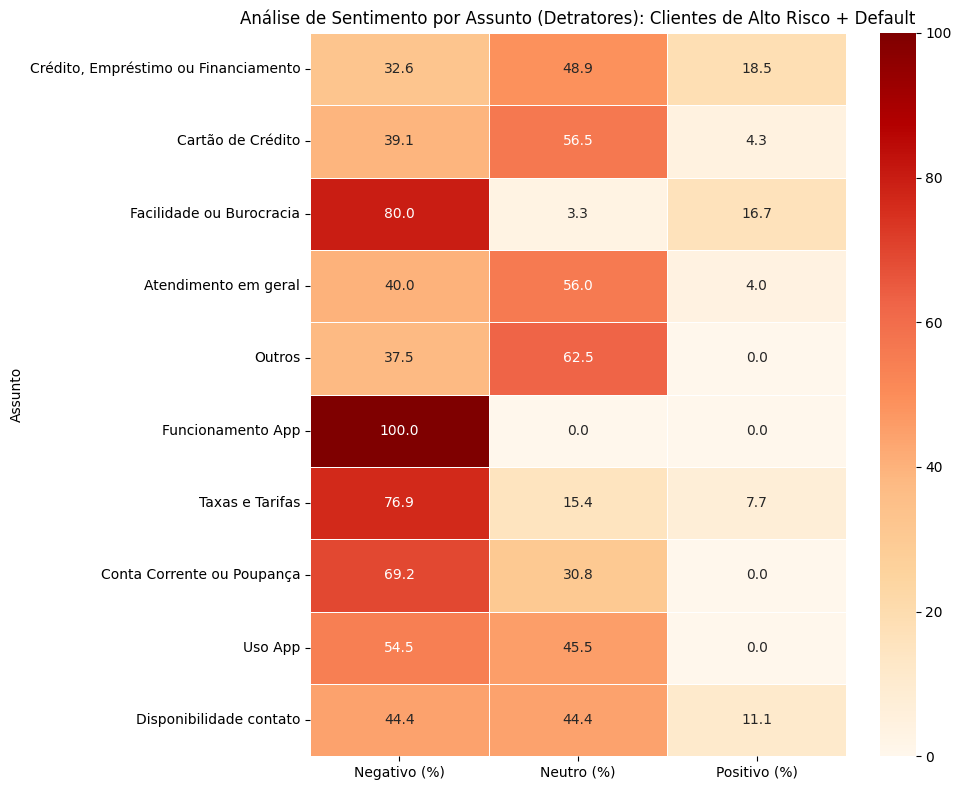

In [45]:
asst_risco['negativo_pct'] = (asst_risco['negativo'] / asst_risco['total']) * 100
asst_risco['neutro_pct'] = (asst_risco['neutro'] / asst_risco['total']) * 100
asst_risco['positivo_pct'] = (asst_risco['positivo'] / asst_risco['total']) * 100
asst_risco = asst_risco.sort_values(by = 'total', ascending = False).reset_index(drop = True).head(10)

heatmap_data = asst_risco.set_index('Assunto')[['negativo_pct', 'neutro_pct', 'positivo_pct']]
heatmap_data.columns = ['Negativo (%)', 'Neutro (%)', 'Positivo (%)']

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='OrRd', linewidths=.5)

plt.title('Análise de Sentimento por Assunto (Detratores): Clientes de Alto Risco + Default')
#plt.xlabel('Sentimento')
plt.ylabel('Assunto')
plt.tight_layout()
plt.show()

### **5.3. Associados AG: Segmento Grande Produtor**

In [46]:
df_sentimento_ag = df_sentimento[(df_sentimento['des_segmento'] == 'AG') & (df_sentimento['des_subsegmento'] == 'Grande Produtor')].reset_index(drop = True)
df_sentimento_ag.head(3)

,num_idade,des_sexo,des_status_associado,des_segmento,des_subsegmento,des_nivel_risco,des_assoc_desde,n_de_produtos,resposta_nps,classificacao_nps,faixa_idade,faixa_produtos,Assunto,Sentimento
0,63,M,ATIVO,AG,Grande Produtor,BAIXO 2,ATÉ 12 MESES,3,5,DETRATORES,56-70,1-4,Tempo ou Agilidade atendimento,negativo
1,43,M,ATIVO,AG,Grande Produtor,ALTO 2,DE 3 A 5 ANOS,4,6,DETRATORES,36-45,1-4,Troca de gerente,negativo
2,45,M,ATIVO,AG,Grande Produtor,BAIXÍSSIMO,DE 6 A 10 ANOS,13,5,DETRATORES,46-55,10-14,"Crédito, Empréstimo ou Financiamento",negativo


In [47]:
asst_ag = df_sentimento_ag.groupby(['Assunto', 'Sentimento']).size().unstack(fill_value=0)
asst_ag.reset_index(inplace = True)

for analise_sentimento in ['negativo', 'neutro', 'positivo']:
    if analise_sentimento not in asst_ag.columns:
        asst_ag[analise_sentimento] = 0

asst_ag['total'] = asst_ag['negativo'] + asst_ag['neutro'] + asst_ag['positivo']
asst_ag.head(3)

Sentimento,Assunto,negativo,neutro,positivo,total
0,"Crédito, Empréstimo ou Financiamento",1,0,0,1
1,Facilidade ou Burocracia,1,0,0,1
2,Tempo ou Agilidade atendimento,1,0,0,1


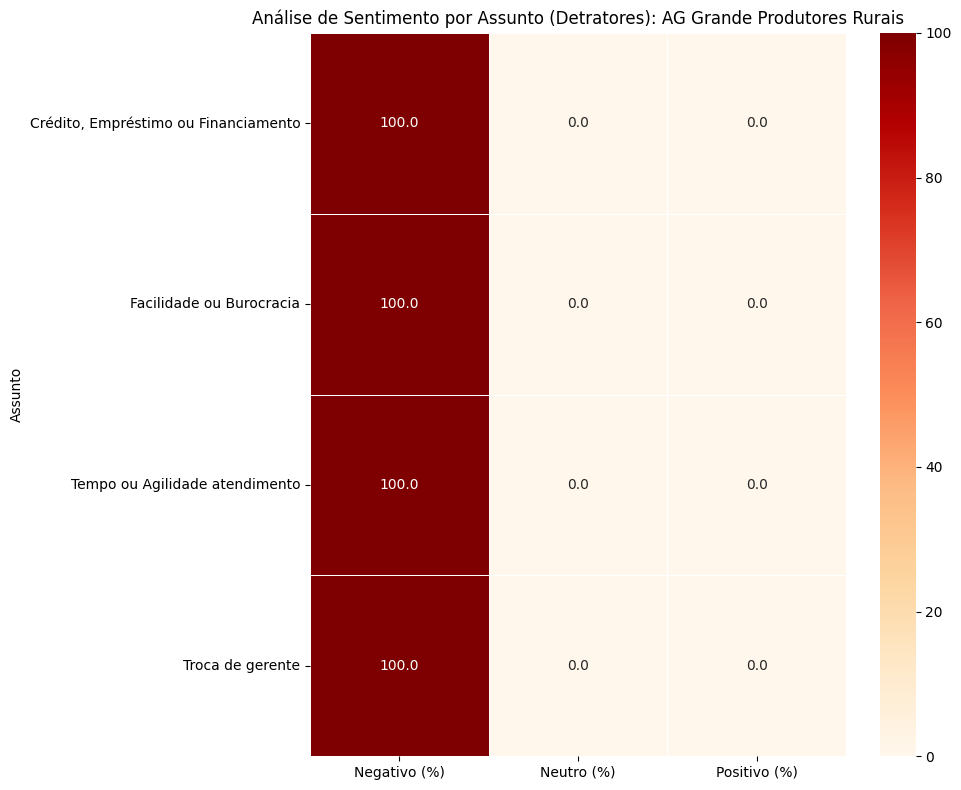

In [48]:
asst_ag['negativo_pct'] = (asst_ag['negativo'] / asst_ag['total']) * 100
asst_ag['neutro_pct'] = (asst_ag['neutro'] / asst_ag['total']) * 100
asst_ag['positivo_pct'] = (asst_ag['positivo'] / asst_ag['total']) * 100
asst_ag = asst_ag.sort_values(by = 'total', ascending = False).reset_index(drop = True).head(10)

heatmap_data = asst_ag.set_index('Assunto')[['negativo_pct', 'neutro_pct', 'positivo_pct']]
heatmap_data.columns = ['Negativo (%)', 'Neutro (%)', 'Positivo (%)']

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='OrRd', linewidths=.5)

plt.title('Análise de Sentimento por Assunto (Detratores): AG Grande Produtores Rurais')
#plt.xlabel('Sentimento')
plt.ylabel('Assunto')
plt.tight_layout()
plt.show()

### **5.4. Faixa Etária (<45 anos)**

In [49]:
df_sentimento_idade = df_sentimento[df_sentimento['num_idade'] <= 45].reset_index(drop = True)
df_sentimento_idade.head(3)

,num_idade,des_sexo,des_status_associado,des_segmento,des_subsegmento,des_nivel_risco,des_assoc_desde,n_de_produtos,resposta_nps,classificacao_nps,faixa_idade,faixa_produtos,Assunto,Sentimento
0,42,M,ATIVO,PF,PF III,BAIXO 1,DE 6 A 10 ANOS,2,5,DETRATORES,36-45,1-4,Atendimento em geral,neutro
1,38,F,INATIVO,PF,PF I,ALTÍSSIMO,DE 1 A 2 ANOS,0,5,DETRATORES,36-45,0,Cartão de Crédito,neutro
2,45,M,ATIVO,PF,PF I,ALTO 2,DE 1 A 2 ANOS,1,5,DETRATORES,46-55,1-4,Cartão de Crédito,negativo


In [50]:
asst_idade = df_sentimento_idade.groupby(['Assunto', 'Sentimento']).size().unstack(fill_value=0)
asst_idade.reset_index(inplace = True)

for analise_sentimento in ['negativo', 'neutro', 'positivo']:
    if analise_sentimento not in asst_idade.columns:
        asst_idade[analise_sentimento] = 0

asst_idade['total'] = asst_idade['negativo'] + asst_idade['neutro'] + asst_idade['positivo']
asst_idade.head(3)

Sentimento,Assunto,negativo,neutro,positivo,total
0,Assertividade ou Orientação,11,4,1,16
1,Atendimento em geral,27,43,5,75
2,Benefícios,18,2,10,30


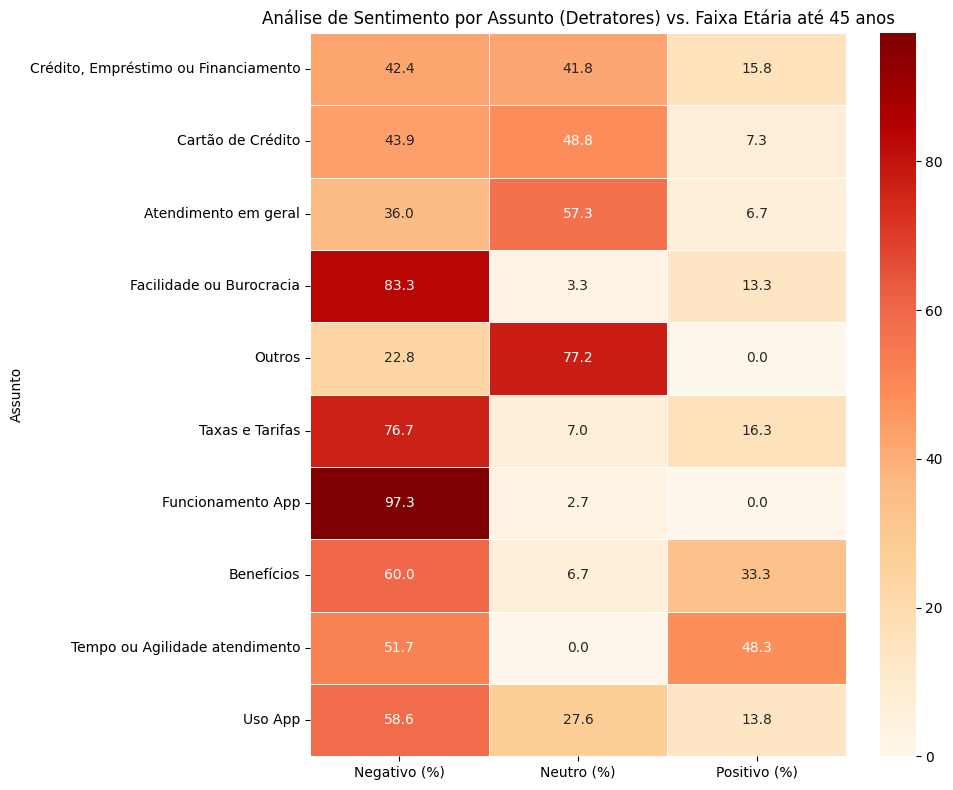

In [51]:
asst_idade['negativo_pct'] = (asst_idade['negativo'] / asst_idade['total']) * 100
asst_idade['neutro_pct'] = (asst_idade['neutro'] / asst_idade['total']) * 100
asst_idade['positivo_pct'] = (asst_idade['positivo'] / asst_idade['total']) * 100
asst_idade = asst_idade.sort_values(by = 'total', ascending = False).reset_index(drop = True).head(10)

heatmap_data = asst_idade.set_index('Assunto')[['negativo_pct', 'neutro_pct', 'positivo_pct']]
heatmap_data.columns = ['Negativo (%)', 'Neutro (%)', 'Positivo (%)']

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='OrRd', linewidths=.5)

plt.title('Análise de Sentimento por Assunto (Detratores) vs. Faixa Etária até 45 anos')
#plt.xlabel('Sentimento')
plt.ylabel('Assunto')
plt.tight_layout()
plt.show()

### **5.5. Inativos**

In [52]:
df_sentimento_inativos = df_sentimento[df_sentimento['des_status_associado'] == 'INATIVO'].reset_index(drop = True)
df_sentimento_inativos.head(3)

,num_idade,des_sexo,des_status_associado,des_segmento,des_subsegmento,des_nivel_risco,des_assoc_desde,n_de_produtos,resposta_nps,classificacao_nps,faixa_idade,faixa_produtos,Assunto,Sentimento
0,38,F,INATIVO,PF,PF I,ALTÍSSIMO,DE 1 A 2 ANOS,0,5,DETRATORES,36-45,0,Cartão de Crédito,neutro
1,56,M,INATIVO,PF,PF II,ALTÍSSIMO,ATÉ 12 MESES,1,2,DETRATORES,56-70,1-4,Outros,neutro
2,30,M,INATIVO,PF,PF I,ALTÍSSIMO,DE 3 A 5 ANOS,0,6,DETRATORES,25-35,0,"Crédito, Empréstimo ou Financiamento",neutro


In [53]:
asst_inativo = df_sentimento_inativos.groupby(['Assunto', 'Sentimento']).size().unstack(fill_value=0)
asst_inativo.reset_index(inplace = True)

for analise_sentimento in ['negativo', 'neutro', 'positivo']:
    if analise_sentimento not in asst_inativo.columns:
        asst_inativo[analise_sentimento] = 0

asst_inativo['total'] = asst_inativo['negativo'] + asst_inativo['neutro'] + asst_inativo['positivo']
asst_inativo.head(3)

Sentimento,Assunto,negativo,neutro,positivo,total
0,Assertividade ou Orientação,1,0,0,1
1,Atendimento em geral,4,2,0,6
2,Benefícios,1,0,0,1


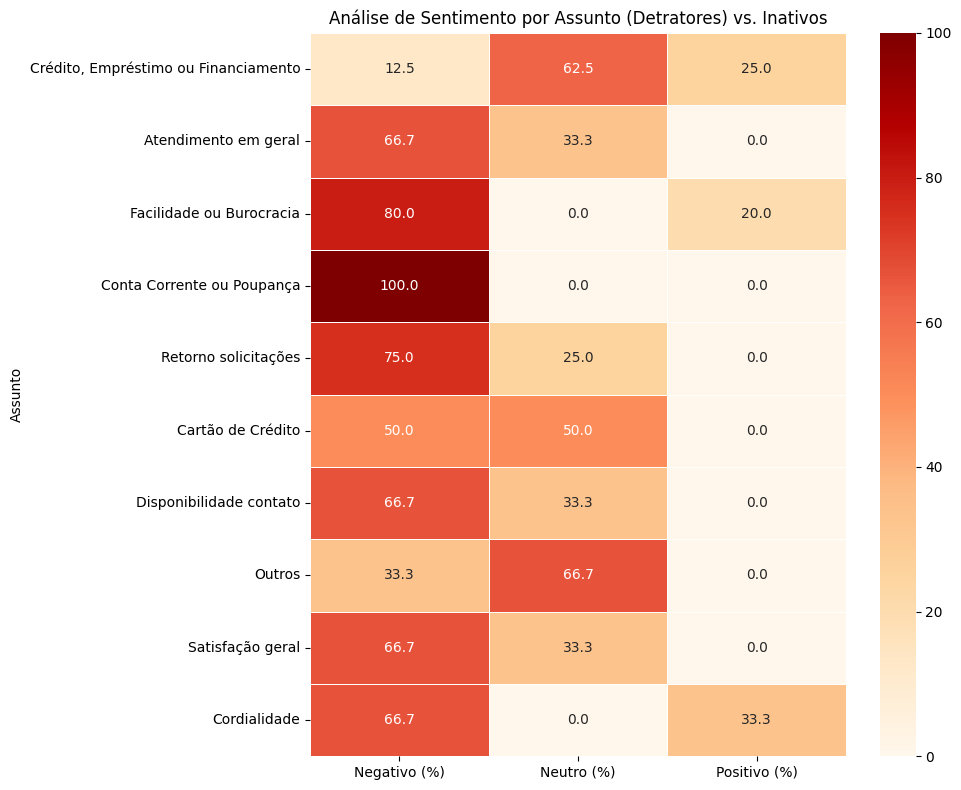

In [54]:
asst_inativo['negativo_pct'] = (asst_inativo['negativo'] / asst_inativo['total']) * 100
asst_inativo['neutro_pct'] = (asst_inativo['neutro'] / asst_inativo['total']) * 100
asst_inativo['positivo_pct'] = (asst_inativo['positivo'] / asst_inativo['total']) * 100
asst_inativo = asst_inativo.sort_values(by = 'total', ascending = False).reset_index(drop = True).head(10)

heatmap_data = asst_inativo.set_index('Assunto')[['negativo_pct', 'neutro_pct', 'positivo_pct']]
heatmap_data.columns = ['Negativo (%)', 'Neutro (%)', 'Positivo (%)']

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='OrRd', linewidths=.5)

plt.title('Análise de Sentimento por Assunto (Detratores) vs. Inativos')
#plt.xlabel('Sentimento')
plt.ylabel('Assunto')
plt.tight_layout()
plt.show()

---
## **6. Download Dataframes**
Download dos dataframes para análise no excel e power BI.

In [55]:
# Analise de Sentimento de Detratores
df_sentimento.to_csv(str(path) + r'/df_sentimentos.csv',
                     sep = ';',
                     encoding = 'latin1',
                     decimal = ',',
                     index = False)

In [56]:
# Desenvolvimento de uma base completa, considerando analise de sentimentos para todo o perfil de clientes do NPS
# Uso Dashboard

colunas_fixas = [col for col in df_corrigido.columns if not col.startswith('des_assunto_') and not col.startswith('des_sentimento_')]
linhas = []

for i in range(1, 4):
    assunto_col = f'des_assunto_{i}'
    sentimento_col = f'des_sentimento_{i}'

    if assunto_col in df_corrigido.columns and sentimento_col in df_corrigido.columns:
        filtro_validos = df_corrigido[[assunto_col, sentimento_col]].notna().all(axis=1)

        temp = df_corrigido.loc[filtro_validos, colunas_fixas + [assunto_col, sentimento_col]]
        temp = temp.rename(columns={assunto_col: 'Assunto', sentimento_col: 'Sentimento'})
        linhas.append(temp)

df_sentimento = pd.concat(linhas, ignore_index=True)
df_sentimento.to_csv(str(path) + r'/df_NPS.csv',
                     sep = ';',
                     encoding = 'latin1',
                     decimal = ',',
                     index = False)
